In [5]:
!pip install pymongo

  Using cached pymongo-3.6.0-cp36-cp36m-manylinux1_x86_64.whl


In [38]:
from pandas import pandas as pd
from pandas.io.json import json_normalize
from pymongo import MongoClient

In [39]:
%matplotlib inline

In [40]:
mongo_client = MongoClient('this-mongo.cc', 27016)
database_reference = mongo_client.twitter
collection_reference = database_reference.tweets

In [41]:
cols = ['_id', 'user.screen_name', 'user.friends_count', 'user.followers_count']
#df_users = pd.DataFrame(cols)
for i in range(0, 200):
    sample_set = collection_reference.aggregate([{'$sample': {'size': 100}}])
    df = json_normalize(list(sample_set))    
    df = df[cols]
    if i == 0:
        df_users = df
    else:
        df_users = df_users.append(df, ignore_index=True)
#df = df.rename(index=str, columns={"_id": "_id", "user.screen_name": "user_screen_name"})

df_users.head(5)

,_id,user.screen_name,user.friends_count,user.followers_count
0,5a5463f547b2a100b50895fd,josearreguin72,102,14
1,5a570c8536dd5f00015bb1f0,unclenappy,1039,3721
2,5a70f87a36dd5f00016afc26,webogre,1218,427
3,5a5795e636dd5f00015bdd90,nancystaack,592,957
4,5a53044447b2a100b507af10,bobridgess,226,339


In [42]:
df_users.shape

(20000, 4)

In [43]:
df_friends_followers = df_users #df_users[['_id', 'user.friends_count', 'user.followers_count']]
df_users = df_users[['_id', 'user.screen_name']]

group_by_user = df_users.groupby(['user.screen_name'])
group_by_data = group_by_user.count()


In [44]:
group_by_data.head(5)

,_id
user.screen_name,
0000028IRAY,1
007Bohn,1
0216cabral2000,3
0ceantal,1
0dd0dee,1


In [45]:
most_freq_tweeters = group_by_data.sort_values(by='_id', ascending=False) #s.nlargest(5, '_id')
most_freq_tweeters = most_freq_tweeters.head(10)
most_freq_tweeters.shape

(10, 1)

In [46]:
most_freq_tweeters

,_id
user.screen_name,
test5geo1798,160
Tj_way,67
newnewspage,36
blk_tray,33
everylotla,33
ChangeTheLAUSD,32
JanGilson,31
SCHJobs,25
TrueLifeOfTimmy,24


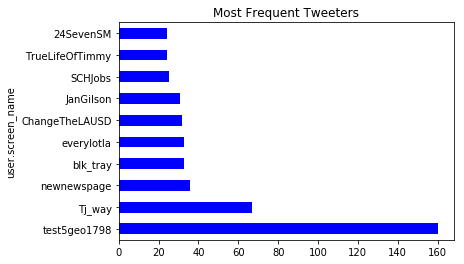

In [47]:
most_freq_tweeters.plot(kind='barh', colormap='winter', legend=False, title="Most Frequent Tweeters")

In [48]:
most_freq_tweeters['_id']

user.screen_name
test5geo1798       160
Tj_way              67
newnewspage         36
blk_tray            33
everylotla          33
ChangeTheLAUSD      32
JanGilson           31
SCHJobs             25
TrueLifeOfTimmy     24
24SevenSM           24
Name: _id, dtype: int64

In [49]:
list(most_freq_tweeters.index)

['test5geo1798',
 'Tj_way',
 'newnewspage',
 'blk_tray',
 'everylotla',
 'ChangeTheLAUSD',
 'JanGilson',
 'SCHJobs',
 'TrueLifeOfTimmy',
 '24SevenSM']

In [53]:
df_friends_followers = df_friends_followers[df_friends_followers['user.screen_name'].isin(list(most_freq_tweeters.index))]

In [54]:
df_friends_group_by = df_friends_followers.groupby(['user.screen_name'])[['user.friends_count', 'user.followers_count']]
df_friends_data = df_friends_group_by.last()
df_friends_data

,user.friends_count,user.followers_count
user.screen_name,,
24SevenSM,102,415
ChangeTheLAUSD,7023,6979
JanGilson,1554,1868
SCHJobs,0,47
Tj_way,24865,25941
TrueLifeOfTimmy,487,2322
blk_tray,718,11689
everylotla,4,454
newnewspage,6161,61959


In [55]:
most_freq_tweeters

,_id
user.screen_name,
test5geo1798,160
Tj_way,67
newnewspage,36
blk_tray,33
everylotla,33
ChangeTheLAUSD,32
JanGilson,31
SCHJobs,25
TrueLifeOfTimmy,24


In [62]:
user_stats = most_freq_tweeters.merge(df_friends_data, left_index=True, right_index=True, how='left')
user_stats

,_id,user.friends_count,user.followers_count
user.screen_name,,,
test5geo1798,160,0,28
Tj_way,67,24865,25941
newnewspage,36,6161,61959
blk_tray,33,718,11689
everylotla,33,4,454
ChangeTheLAUSD,32,7023,6979
JanGilson,31,1554,1868
SCHJobs,25,0,47
TrueLifeOfTimmy,24,487,2322


In [83]:
user_stats = most_freq_tweeters.merge(df_friends_data, left_index=True, right_index=True, how='left')
user_stats_sc = (user_stats - user_stats.mean())/user_stats.std()

In [74]:
import matplotlib.pyplot as plt

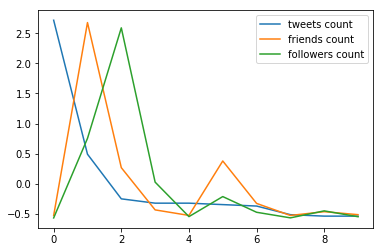

In [85]:
plt.plot(user_stats_sc._id.values, label='tweets count')
plt.plot(user_stats_sc['user.friends_count'].values, label='friends count')
plt.plot(user_stats_sc['user.followers_count'].values, label='followers count')
plt.legend()